In [6]:
using Distributions, Plots

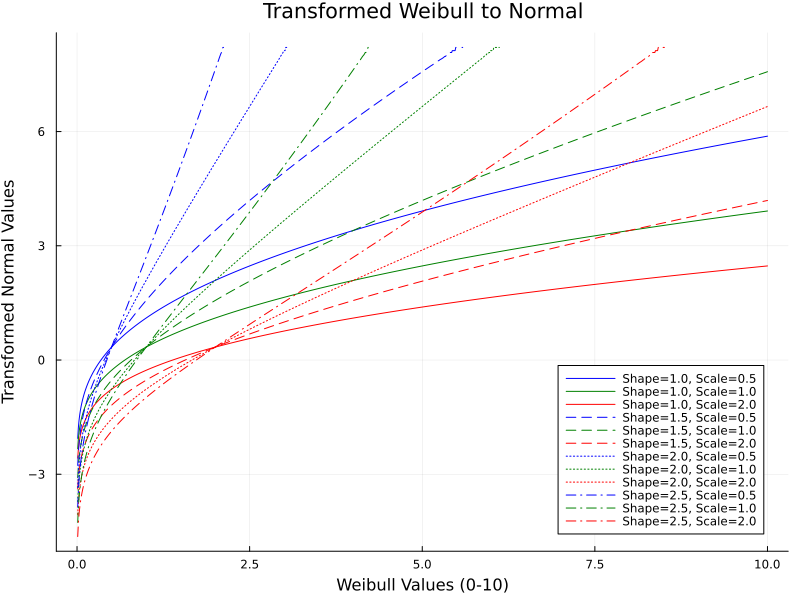

In [13]:
# Define the range of x values (0 to 10)
line_styles = [:solid, :dash, :dot, :dashdot]  # Define line styles for different shapes
colors = [:blue, :green, :red]  # Define colors for different scales
x_values = range(0, stop=10, length=1000)

# Define shape and scale values
shape_values = [1.0, 1.5, 2.0, 2.5]
scale_values = [0.5, 1.0, 2.0]

# Initialize a single plot
plt = plot(size=(800, 600), xlabel="Weibull Values (0-10)", ylabel="Transformed Normal Values", title="Transformed Weibull to Normal")

# Loop through shape and scale values
for (i, shape) in enumerate(shape_values)
    for (j, scale) in enumerate(scale_values)
        # Compute the CDF of the Weibull distribution for the x values
        weibull_dist = Weibull(shape, scale)
        weibull_cdf_x = cdf.(weibull_dist, x_values)

        # Transform to standard normal distribution
        normal_transformed_x = quantile.(Normal(0, 1), weibull_cdf_x)

        # Plot the transformed values with line style and color
        plot!(plt, x_values, normal_transformed_x, label="Shape=$shape, Scale=$scale", linestyle=line_styles[i], color=colors[j])
    end
end

plot!(legend=:bottomright)
savefig("results/transformed_weibull_to_normal.png")
plot!()